In [3]:
from collections import deque

# GraphNode used for adjacency list
class GraphNode:
    def __init__(self, val):
        self.val = val
        self.neighbors = []

# Or use a HashMap
adjList = { "A": [], "B": [] }

# Given directed edges, build an adjacency list
edges = [["A", "B"], ["B", "C"], ["B", "E"], ["C", "E"], ["E", "D"]]

adjList = {}

for src, dst in edges:
    if src not in adjList:
        adjList[src] = []
    if dst not in adjList:
        adjList[dst] = []
    adjList[src].append(dst)


# Count paths (backtracking)
def dfs(node, target, adjList, visit):
    if node in visit:
        return 0
    if node == target:
        return 1
    
    count = 0
    visit.add(node)
    for neighbor in adjList[node]:
        count += dfs(neighbor, target, adjList, visit)
    visit.remove(node)

    return count

# Shortest path from node to target
def bfs(node, target, adjList):
    length = 0
    visit = set()
    visit.add(node)
    queue = deque()
    queue.append(node)

    while queue:
        for i in range(len(queue)):
            curr = queue.popleft()
            if curr == target:
                return length

            for neighbor in adjList[curr]:
                if neighbor not in visit:
                    visit.add(neighbor)
                    queue.append(neighbor)
        length += 1
    return length


Clone Graph

Given a node in a connected undirected graph, return a deep copy of the graph.

Each node in the graph contains an integer value and a list of its neighbors.

class Node {
    public int val;
    public List<Node> neighbors;
}
The graph is shown in the test cases as an adjacency list. An adjacency list is a mapping of nodes to lists, used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

For simplicity, nodes values are numbered from 1 to n, where n is the total number of nodes in the graph. The index of each node within the adjacency list is the same as the node's value (1-indexed).

The input node will always be the first node in the graph and have 1 as the value.

Example 1:

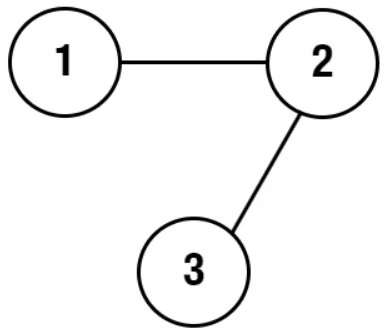

Input: adjList = [[2],[1,3],[2]]

Output: [[2],[1,3],[2]]
Explanation: There are 3 nodes in the graph.
Node 1: val = 1 and neighbors = [2].
Node 2: val = 2 and neighbors = [1, 3].
Node 3: val = 3 and neighbors = [2].

Example 2:

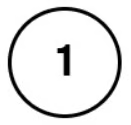

Input: adjList = [[]]

Output: [[]]
Explanation: The graph has one node with no neighbors.

Example 3:

Input: adjList = []

Output: []
Explanation: The graph is empty.

Constraints:

0 <= The number of nodes in the graph <= 100.
1 <= Node.val <= 100
There are no duplicate edges and no self-loops in the graph.

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:

        if not node:
            return
        
        hm = {}
        hm[node] = Node(val=node.val)
        q = deque([node])

        while q:
            cur = q.popleft()
            for nei in cur.neighbors:
                if nei not in hm:
                    hm[nei] = Node(val=nei.val)
                    q.append(nei)
                hm[cur].neighbors.append(hm[nei])
        return hm[node]      

Course Schedule
You are given an array prerequisites where prerequisites[i] = [a, b] indicates that you must take course b first if you want to take course a.

The pair [0, 1], indicates that must take course 1 before taking course 0.

There are a total of numCourses courses you are required to take, labeled from 0 to numCourses - 1.

Return true if it is possible to finish all courses, otherwise return false.

Example 1:

Input: numCourses = 2, prerequisites = [[0,1]]

Output: true
Explanation: First take course 1 (no prerequisites) and then take course 0.

Example 2:

Input: numCourses = 2, prerequisites = [[0,1],[1,0]]

Output: false
Explanation: In order to take course 1 you must take course 0, and to take course 0 you must take course 1. So it is impossible.

Constraints:

1 <= numCourses <= 1000
0 <= prerequisites.length <= 1000
prerequisites[i].length == 2
0 <= a[i], b[i] < numCourses
All prerequisite pairs are unique.

In [6]:
prerequisites = [[1, 0], [2, 0], [3, 1], [3, 2]]
from collections import defaultdict
adj = defaultdict(list)

for src,dst in prerequisites:
    adj[src].append(dst)
adj

defaultdict(list, {1: [0], 2: [0], 3: [1, 2]})

In [11]:
from collections import defaultdict
class Solution:
    def canFinish(self, numCourses, prerequisites):
        adj = defaultdict(list)

        for src,dst in prerequisites:
            adj[src].append(dst)

        visited = 2
        visiting = 1
        unvisited = 0
        state = [unvisited] * numCourses
        def dfs(node):
            if state[node] == visited: return True
            if state[node] == visiting: return False

            state[node] = visiting

            for i in adj[node]:
                if not dfs(i):
                    return False
            state[node] = visited
            return True
        
        for i in range(numCourses):
            if not dfs(i):
                return False
        return True
    
Solution().canFinish(4,[[1, 0], [2, 0], [3, 1], [3, 2]])

True